# Sales Prediction 

[<img style="display: block;-webkit-user-select: none;margin: auto;cursor: zoom-in;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://ualr.edu/www/files/2020/09/sales-increase2.jpeg" width="706" height="456">](http://)

## (Simple linear Regression)


**Problem Statement** 

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Import required Packages 

In [1]:
import numpy as np # for numerical mathematics
import pandas as pd # for data analysis
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv")
df.sample(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
92,93,217.7,33.5,59.0,19.4
172,173,19.6,20.1,17.0,7.6
75,76,16.9,43.7,89.4,8.7
161,162,85.7,35.8,49.3,13.3
42,43,293.6,27.7,1.8,20.7
123,124,123.1,34.6,12.4,15.2
52,53,216.4,41.7,39.6,22.6
137,138,273.7,28.9,59.7,20.8
87,88,110.7,40.6,63.2,16.0
127,128,80.2,0.0,9.2,8.8


## This is Regression Problem 
#### our output has numerical values 

In [3]:
df.info()
# there is no null values 
# all columns have numerical values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Checking Duplicates value

In [4]:
df.duplicated().sum()

# no duplicate value is present 

0

In [5]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
TV Ad Budget ($),200.000000,147.042500,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
Radio Ad Budget ($),200.000000,23.264000,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
Newspaper Ad Budget ($),200.000000,30.554000,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
Sales ($),200.000000,14.022500,5.217457,1.600000,10.375000,12.900000,17.400000,27.000000


## Removing Unnamed column 

In [6]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
# this column has no use 

## checking outliers

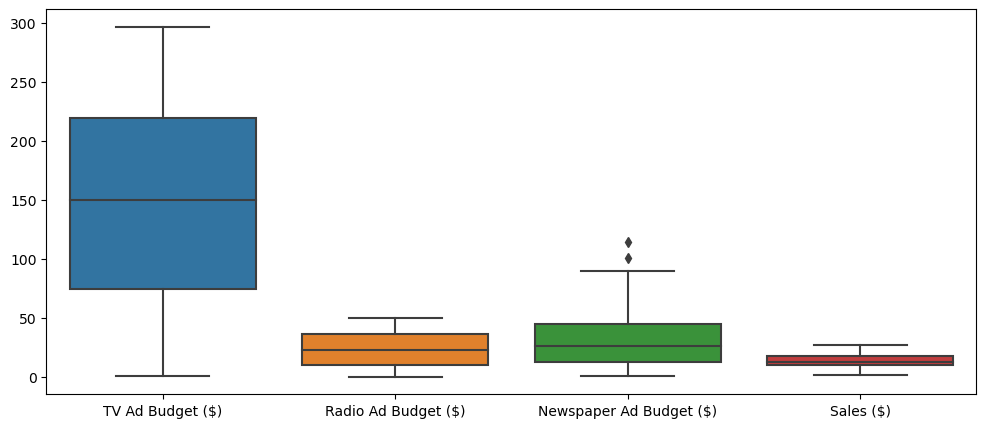

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(df)
plt.show()           

### Newspaper Ad Budget ($) colummn has little outlier 
#### so removing  upto 5% data will effect our dataset

In [8]:
a=df["Newspaper Ad Budget ($)"].quantile(0.98)
df_new=df[df["Newspaper Ad Budget ($)"]<a]

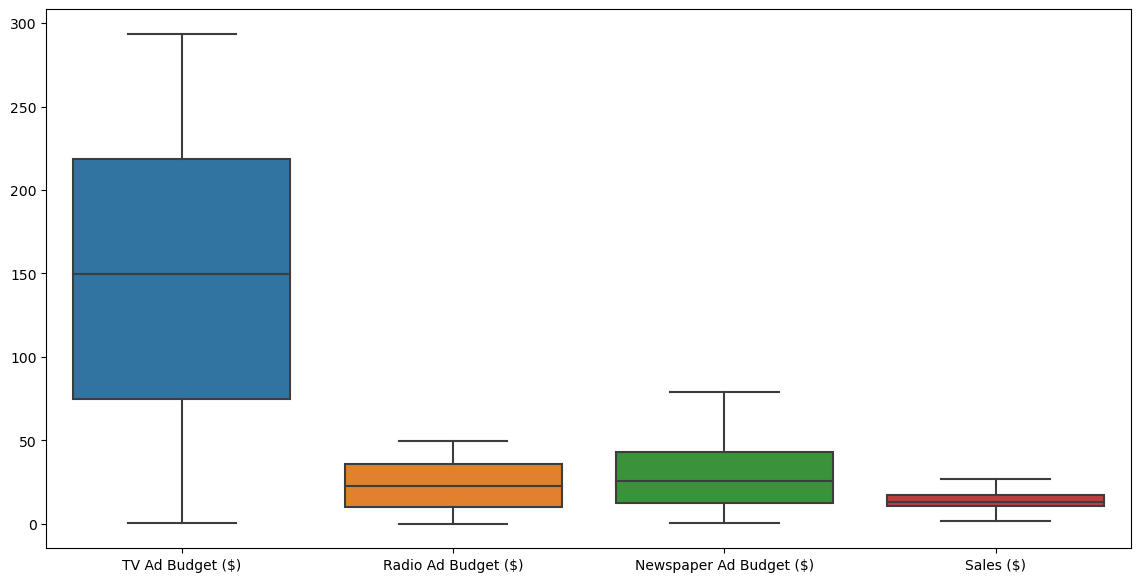

In [9]:
plt.figure(figsize=(14,7))
sns.boxplot(df_new)
plt.show()
# no more outlier is present 

In [10]:
print("No. of rows we lost",df.shape[0]-df_new.shape[0])

No. of rows we lost 4


<AxesSubplot:ylabel='Density'>

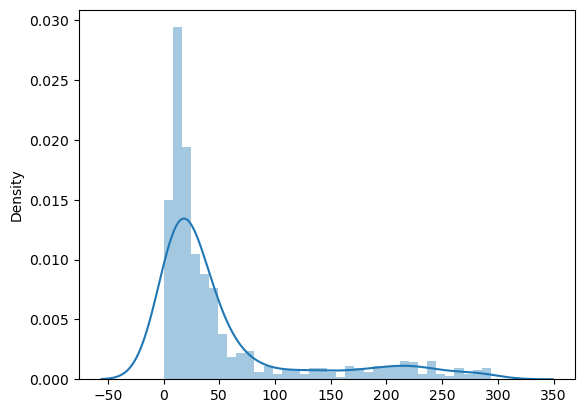

In [11]:
sns.distplot(df_new,kde=True)
# right skewed 

## Now data is cleaned 

<AxesSubplot:>

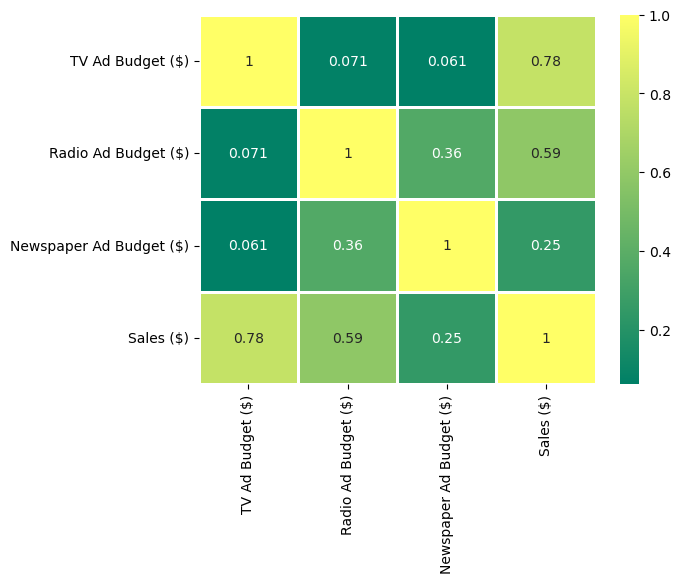

In [12]:
sns.heatmap(df_new.corr(),cmap="summer",annot=True,linewidth=2)

<AxesSubplot:ylabel='Count'>

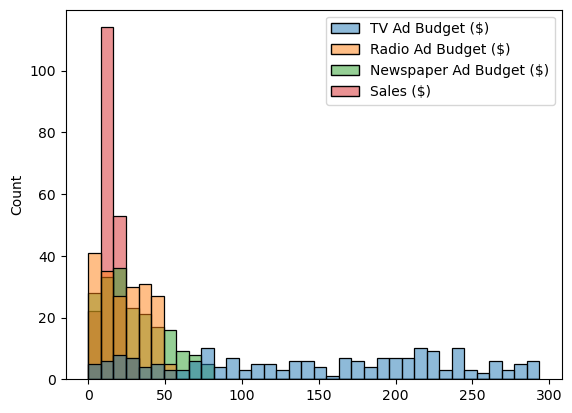

In [13]:
sns.histplot(df_new)

Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

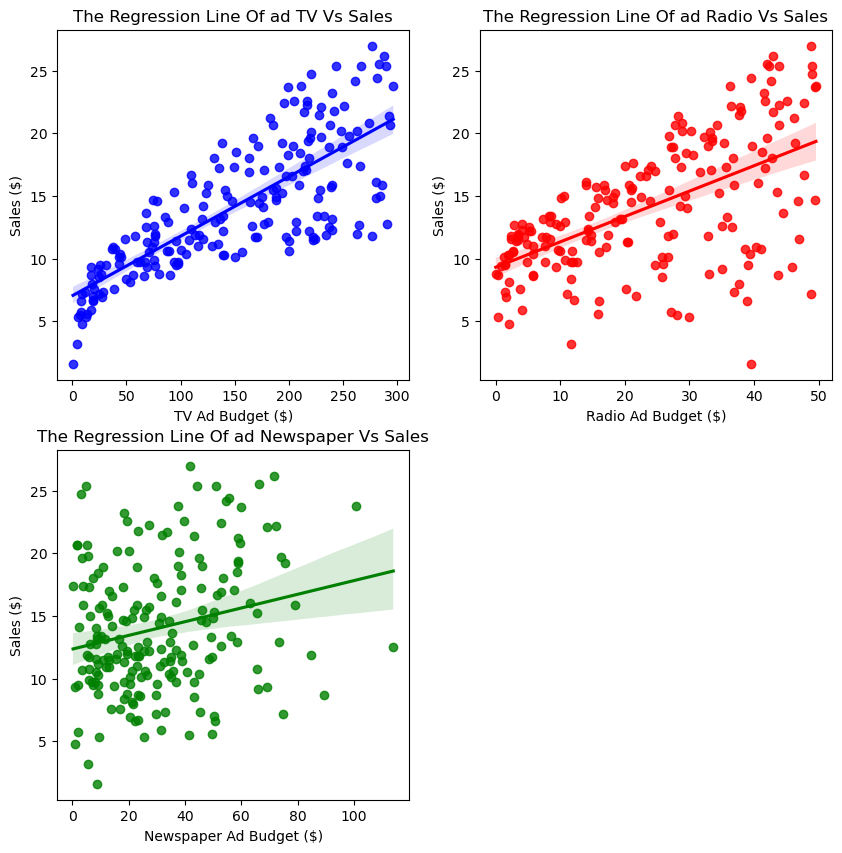

In [14]:
# Plotting the regression line
from matplotlib import figure
plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV Ad Budget ($)',y='Sales ($)',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio Ad Budget ($)',y='Sales ($)',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper Ad Budget ($)',y='Sales ($)',color='g').set_title('The Regression Line Of ad Newspaper Vs Sales')

## Model building

In [15]:
x=df_new.drop(["Sales ($)"],axis=1)
y=df_new["Sales ($)"]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70,random_state=12345)

### build different models and check which is best 
- 1. using linear regression 
- 2. using Lasso
- 3. using Ridge 
- 4. using Elasticnet 

In [17]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1. using linear regression 

- linear regression is the most basic 
- in this if the model feels like one particular feature is important,then the model model may place a large weight to that feature.
- this sometimes lead to overfitting in small datasets.
- hence, Lasso,Ridge,ElasticNet are invented

In [18]:
lr=LinearRegression()
linear_model=lr.fit(x,y)
y_pred_lr=linear_model.predict(x_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_lr)
mse=mean_squared_error(y_test,y_pred_lr)
r2=r2_score(y_test,y_pred_lr)
print("mean absolute error ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ", linear_model.coef_)
print("Intercept of the model:  ", linear_model.intercept_)

mean absolute error  1.2493
mean square error 2.8542
r2 score 0.9027
------------------------------
Coefficients of the model:  [0.04549721 0.18680184 0.0035565 ]
Intercept of the model:   2.9108106664914146


## Using Lasso 

- L-1 regulation

- Lasso is the modification of linear regression
- set irrelavnt values to zero.
- might remove too many features in your model.

In [19]:
ls=Lasso()
linear_model=ls.fit(x,y)
y_pred_ls=linear_model.predict(x_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_ls)
mse=mean_squared_error(y_test,y_pred_ls)
r2=r2_score(y_test,y_pred_ls)
print("mean absolute erro ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ", linear_model.coef_)
print("Intercept of the model:  ", linear_model.intercept_)

mean absolute erro  1.2618
mean square error 2.8909
r2 score 0.9015
------------------------------
Coefficients of the model:  [0.04542731 0.182979   0.00202595]
Intercept of the model:   3.0541685088502657


# with Ridge 
- L-2 regulation 
- enforce the B coefficients to be lower,but not zero.
- does not remove irrelvant feature,but minimizes their impact.

In [20]:
rd=Ridge()
linear_model=rd.fit(x,y)
y_pred_rd=linear_model.predict(x_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_rd)
mse=mean_squared_error(y_test,y_pred_rd)
r2=r2_score(y_test,y_pred_rd)
print("mean absolute error ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ", linear_model.coef_)
print("Intercept of the model:  ", linear_model.intercept_)

mean absolute error  1.2493
mean square error 2.8542
r2 score 0.9027
------------------------------
Coefficients of the model:  [0.04549722 0.18679683 0.00355782]
Intercept of the model:   2.910886640206604


# ElasticNet
- it is a hybrid of Lasso and Ridge

In [21]:
En=ElasticNet()
linear_model=En.fit(x,y)
y_pred_En=linear_model.predict(x_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_En)
mse=mean_squared_error(y_test,y_pred_En)
r2=r2_score(y_test,y_pred_En)
print("mean absolute error ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ", linear_model.coef_)
print("Intercept of the model:  ", linear_model.intercept_)

mean absolute error  1.2566
mean square error 2.8741
r2 score 0.9021
------------------------------
Coefficients of the model:  [0.04546323 0.18440552 0.00291909]
Intercept of the model:   2.989827459449579


In [22]:
dict1={"mae":[1.2493,1.2618,1.2493,1.2566],
     "mse":[2.8542,2.8909,2.8542,2.8741],
     "r2_score":[0.9027,0.9015,0.9027,0.9021],
     "coefficients_TV":[0.04549721,0.04542731,0.04549722,0.04546323],
     "coefficents_Radio":[0.182979,0.182979,0.18679683,0.18440552],
     "coefficents_Newspaper":[0.0035565,0.00202595,0.00355782,0.00291909],
     "Intercept":[ 2.9108106664914146,3.0541685088502657, 2.910886640206604,2.989827459449579]}
pd.DataFrame(dict1,index=["Normal linear","Lasso","Ridge","ElasticNet"])

,mae,mse,r2_score,coefficients_TV,coefficents_Radio,coefficents_Newspaper,Intercept
Normal linear,1.2493,2.8542,0.9027,0.045497,0.182979,0.003557,2.910811
Lasso,1.2618,2.8909,0.9015,0.045427,0.182979,0.002026,3.054169
Ridge,1.2493,2.8542,0.9027,0.045497,0.186797,0.003558,2.910887
ElasticNet,1.2566,2.8741,0.9021,0.045463,0.184406,0.002919,2.989827


## Conclusion

- above values are most similar 
- our dataset has only 200 rows and 4 columns which is very small dataset 
- while working with good dataset,the above value differ a lot 
- and based on our need we have to choose our model which is best